# Analysis of optimal change for 3-coin denominations

For all possible coin denominations with coin values < 100 cents. Searched for optimal fewest-coin change-making solution using each denomination, for amounts between 1 and 99 cents. 

All denominations must include a 1-cent coin (as *coin1*), to be able to change all amounts. Therefore the variables are *coin2* and *coin3*. 

In [1]:
library(ggplot2)
library(plyr)
library(reshape2)
library(gmp)

## Read data

In [2]:
d <- read.table("denom_3_uniform_solutions.tsv",header=T,sep="\t")

In [4]:
head(d)

coin1,coin2,coin3,amount,bestcount,numsolutions
1,2,10,1,1,1
1,2,10,2,1,1
1,2,10,3,2,1
1,2,10,4,2,1
1,2,10,5,3,1
1,2,10,6,3,1


`bestcount` - Optimal fewest-coin solution for given amount and denomination

`numsolutions` - Number of possible solutions using `bestcount` number of coins

## Take mean best-counts

Mean best-count and number of solutions for each denomination (Which denominations are most efficient for change making?)

In [5]:
d.bydenom <- ddply(d,
                   c('coin1','coin2','coin3'),
                   function(x) data.frame(bestcount=mean(x$bestcount), 
                                          numsolutions=mean(x$numsolutions)))

Mean best-count and number of solutions, for each amount (Which amounts are hard to change?)

In [6]:
d.byamt <- ddply(d,
                 'amount',
                 function(x) data.frame(bestcount=mean(x$bestcount),
                                        numsolutions=mean(x$numsolutions)))

In [7]:
head(d.bydenom)

coin1,coin2,coin3,bestcount,numsolutions
1,2,3,17.000000,1.323232
1,2,4,13.131313,1.000000
1,2,5,10.808081,1.000000
1,2,6,9.414141,1.000000
1,2,7,8.424242,1.000000
1,2,8,7.797980,1.000000


In [8]:
head(d.byamt)

amount,bestcount,numsolutions
1,1.000000,1.00000
2,1.979592,1.00000
3,2.938986,1.00000
4,3.858405,1.00021
5,4.778035,1.00000
6,5.618977,1.00021


# By denomination

Which denomination requires the fewest coins on average to make change?

Also display which are the denominations within 1% of this optimal solution

In [195]:
head(d.bydenom[order(d.bydenom$bestcount),])

,coin1,coin2,coin3,bestcount,numsolutions
932,1,12,19,5.202020,1
491,1,7,23,5.212121,1
578,1,8,19,5.232323,1
671,1,9,22,5.232323,1
1017,1,13,18,5.232323,1
844,1,11,18,5.242424,1


This matches result from Shallit 2003 (slight difference because he made change for amounts 1 to 100, but I do it for amounts 1 to 99). Although we know that this is the best solution, how much better is it than the next-best solutions? What is the solution landscsape like for different denominations?

### Solution 'landscape' for different denominations

Because we have only three coins, of which two can be varied, we can plot the solutions in two dimensions. We use color scale to indicate the mean number of coins to make optimal change for amounts between 1 and 99.

pdf 
  2

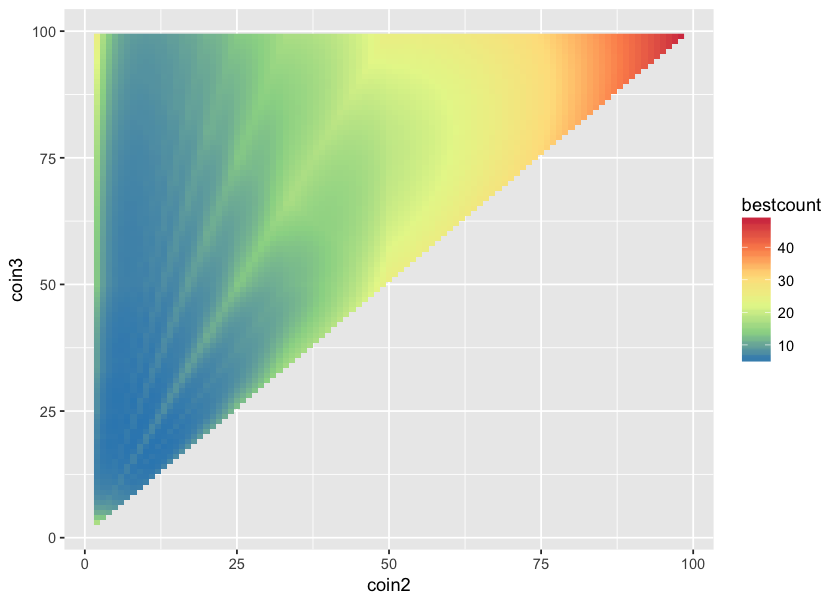

In [73]:
options(repr.plot.width=7, repr.plot.height=5)
d.plot.bestcount.raster <- (ggplot(d.bydenom,aes(coin2,coin3)) 
                            + geom_raster(aes(fill=bestcount)) 
                            + scale_fill_distiller(palette='Spectral')
                            )
d.plot.bestcount.raster
png("denomination_3_analysis_solution_landscape.png",width=640,height=480)
d.plot.bestcount.raster
dev.off()

We see some 'stripes' across the plot, representing certain denominations which are locally more costly for changemaking. The stripes look like there might be some kind of pattern. We overlay 1:2, 1:3 ... lines for comparison

pdf 
  2

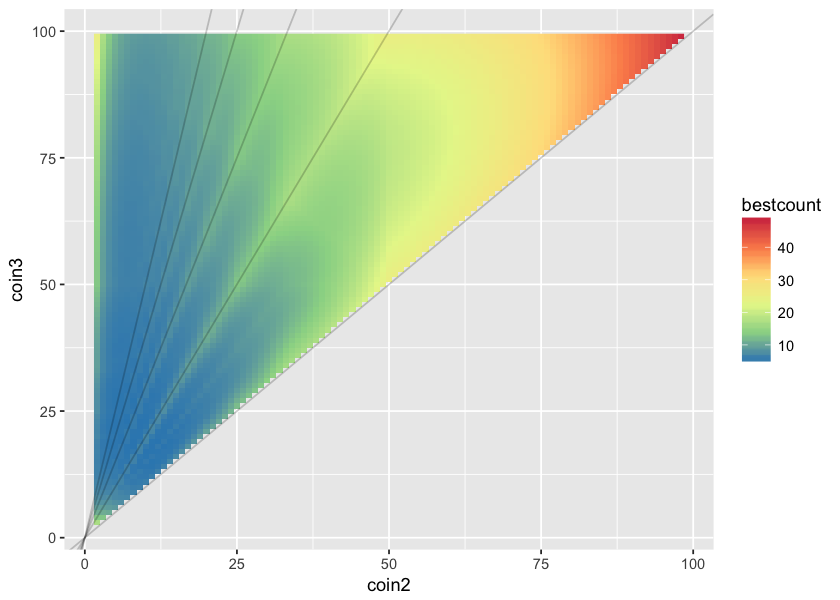

In [74]:
options(repr.plot.width=7, repr.plot.height=5)
d.plot.bestcount.raster + geom_abline(slope=c(1,2,3,4,5),alpha=0.2)
png("denomination_3_analysis_solution_landscape_withlines.png",width=640,height=480)
d.plot.bestcount.raster + geom_abline(slope=c(1,2,3,4,5),alpha=0.2)
dev.off()

This seems to show that when denominations contain two coins which are simple multiples of each other, e.g. `1 10 20`, `1 15 30`, they are less efficient at making change. This makes sense intuitively, because the coin denominations will have fewer prime factors overall. 

To illustrate, we take profiles across the two-dimensional surface for different values of *coin3*

pdf 
  2

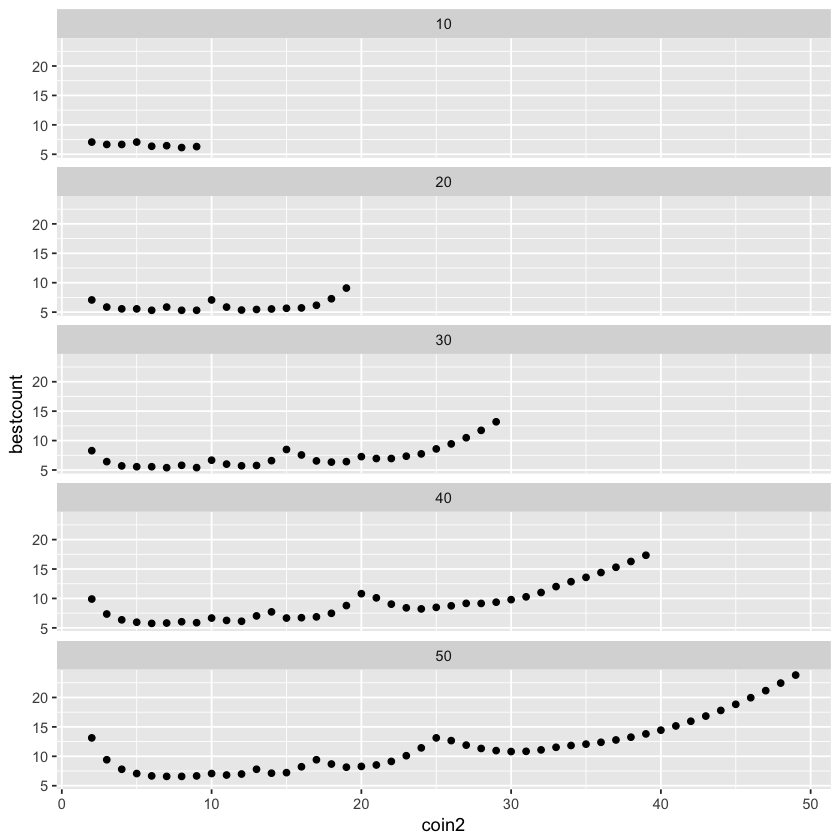

In [76]:
options(repr.plot.width=7, repr.plot.height=7)
(ggplot(subset(d.bydenom,d.bydenom$coin3 %in% c(10,20,30,40,50)),
        aes(coin2,bestcount)) 
 + geom_point() 
 + facet_wrap(~coin3,ncol=1)
)

png("denomination_3_analysis_solution_landscape_transect.png",width=640,height=640)
(ggplot(subset(d.bydenom,d.bydenom$coin3 %in% c(10,20,30,40,50)),
        aes(coin2,bestcount)) 
 + geom_point() 
 + facet_wrap(~coin3,ncol=1)
)
dev.off()

### How many redundant solutions?

pdf 
  2

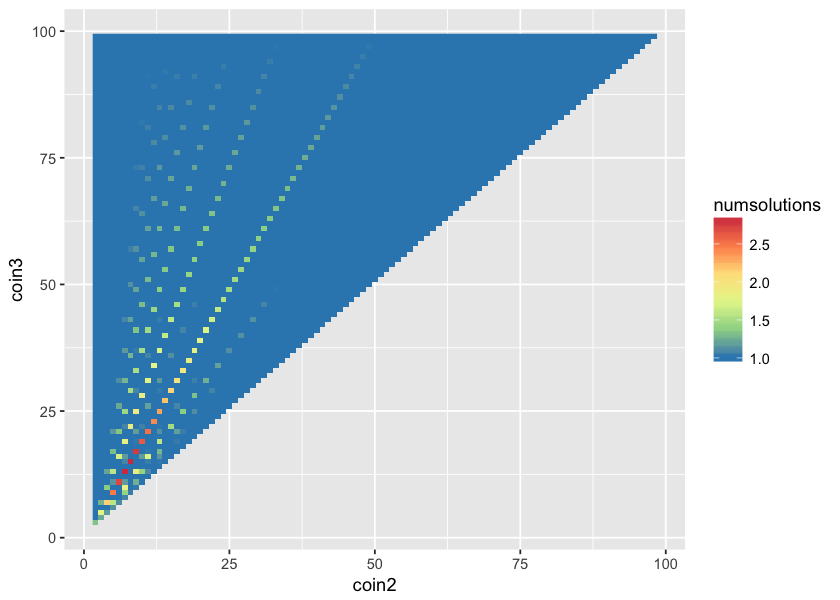

In [77]:
options(repr.plot.width=7, repr.plot.height=5)
(ggplot(d.bydenom,aes(coin2,coin3)) 
 + geom_raster(aes(fill=numsolutions)) 
 + scale_fill_distiller(palette='Spectral')
)

png("denomination_3_analysis_numsolutions_landscape.png",width=640,height=480)
(ggplot(d.bydenom,aes(coin2,coin3)) 
 + geom_raster(aes(fill=numsolutions)) 
 + scale_fill_distiller(palette='Spectral')
)
dev.off()

How can we explain this pattern? Let's look in detail at the part of the plot between 1 and 25.

pdf 
  2

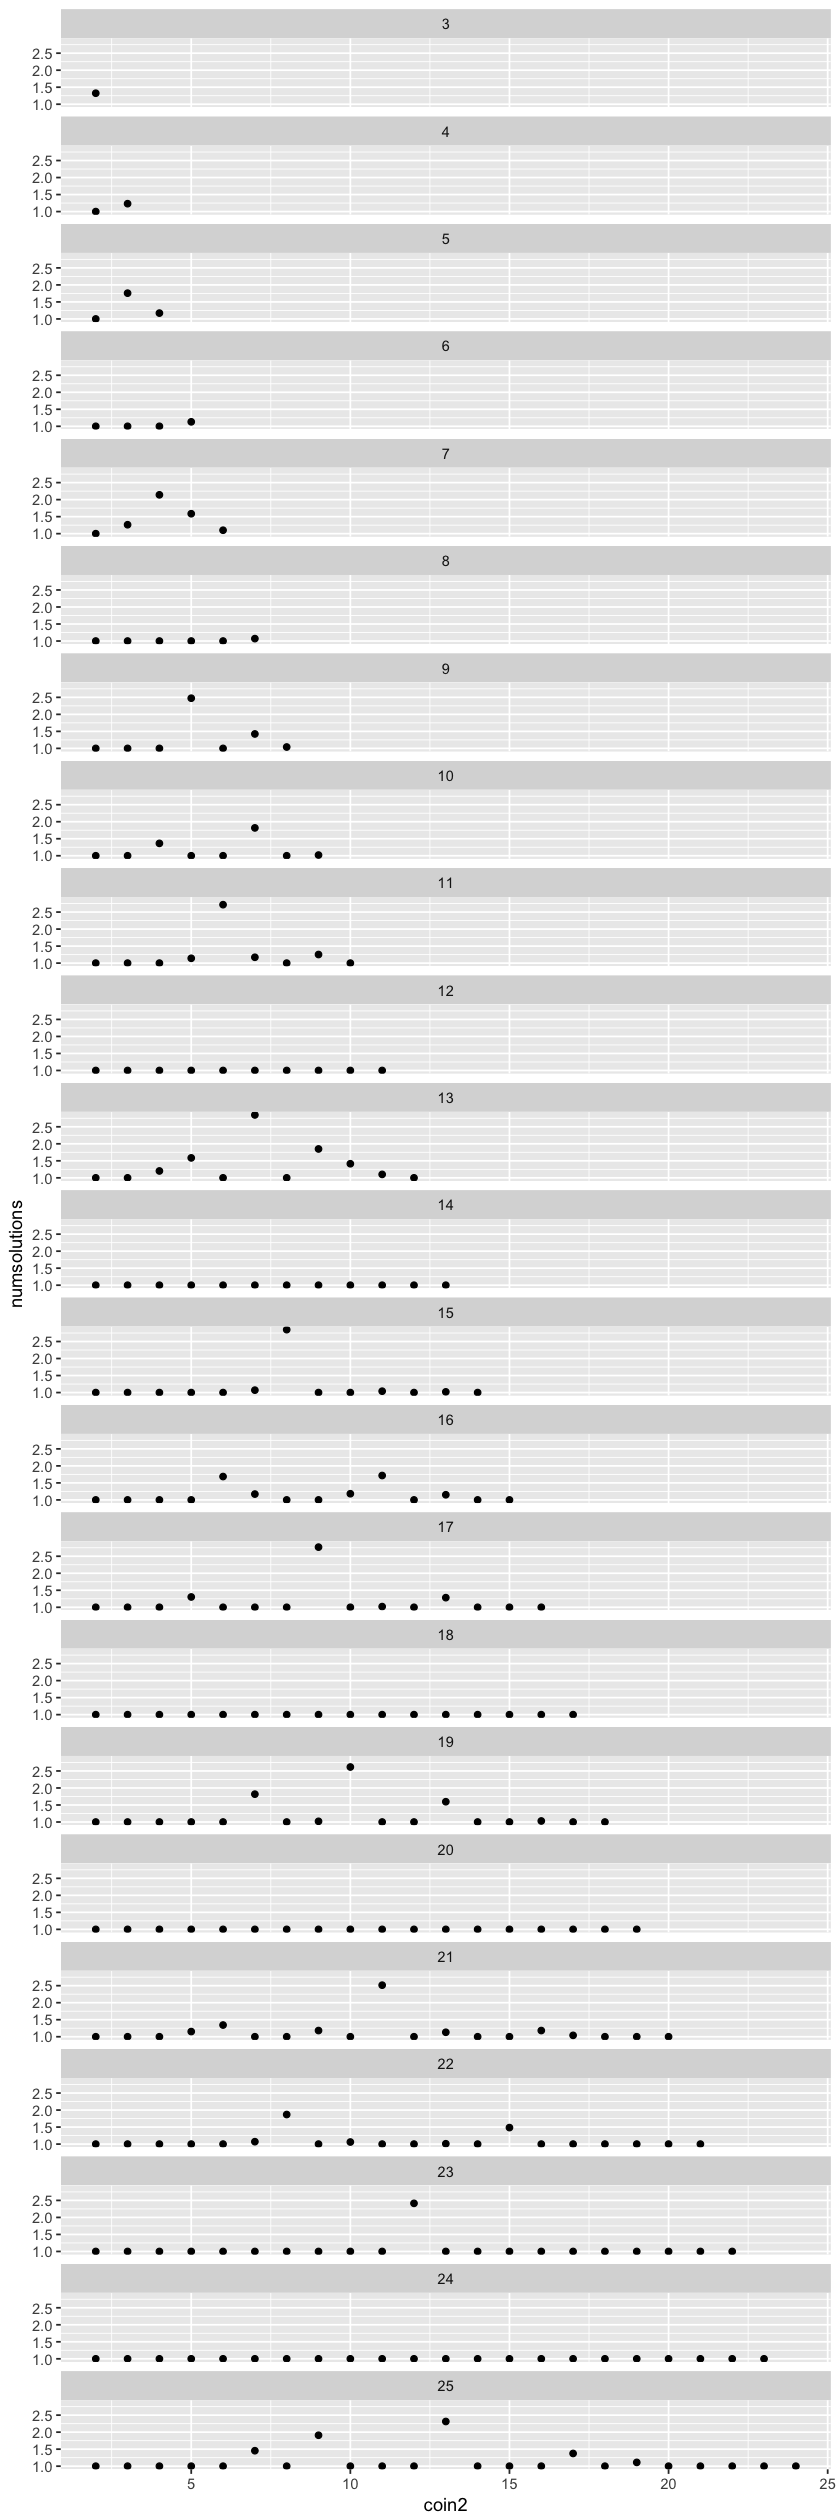

In [78]:
options(repr.plot.width=7, repr.plot.height=21)
(ggplot(subset(d.bydenom,d.bydenom$coin3 %in% 1:25),aes(x=coin2)) 
 + geom_point(aes(y=numsolutions)) 
 + facet_wrap(~coin3,ncol=1)
)

png("denomination_3_analysis_numsolutions_transect.png",width=640,height=1280)
(ggplot(subset(d.bydenom,d.bydenom$coin3 %in% 1:25),aes(x=coin2)) 
 + geom_point(aes(y=numsolutions)) 
 + facet_wrap(~coin3,ncol=1)
 )
dev.off()

Could the peaks represent coin combinations with fewer prime factors? 

Function `factorize()` is from package `gmp`

In [59]:
d.bydenom.primefactors <- ddply(d.bydenom, 
                                c('coin1','coin2','coin3','bestcount','numsolutions'),
                                function(x) data.frame(numfactors=length(factorize(x$coin2*x$coin3))))

In [60]:
head(d.bydenom.primefactors)

coin1,coin2,coin3,bestcount,numsolutions,numfactors
1,2,3,17.000000,1.323232,2
1,2,4,13.131313,1.000000,3
1,2,5,10.808081,1.000000,2
1,2,6,9.414141,1.000000,3
1,2,7,8.424242,1.000000,2
1,2,8,7.797980,1.000000,4


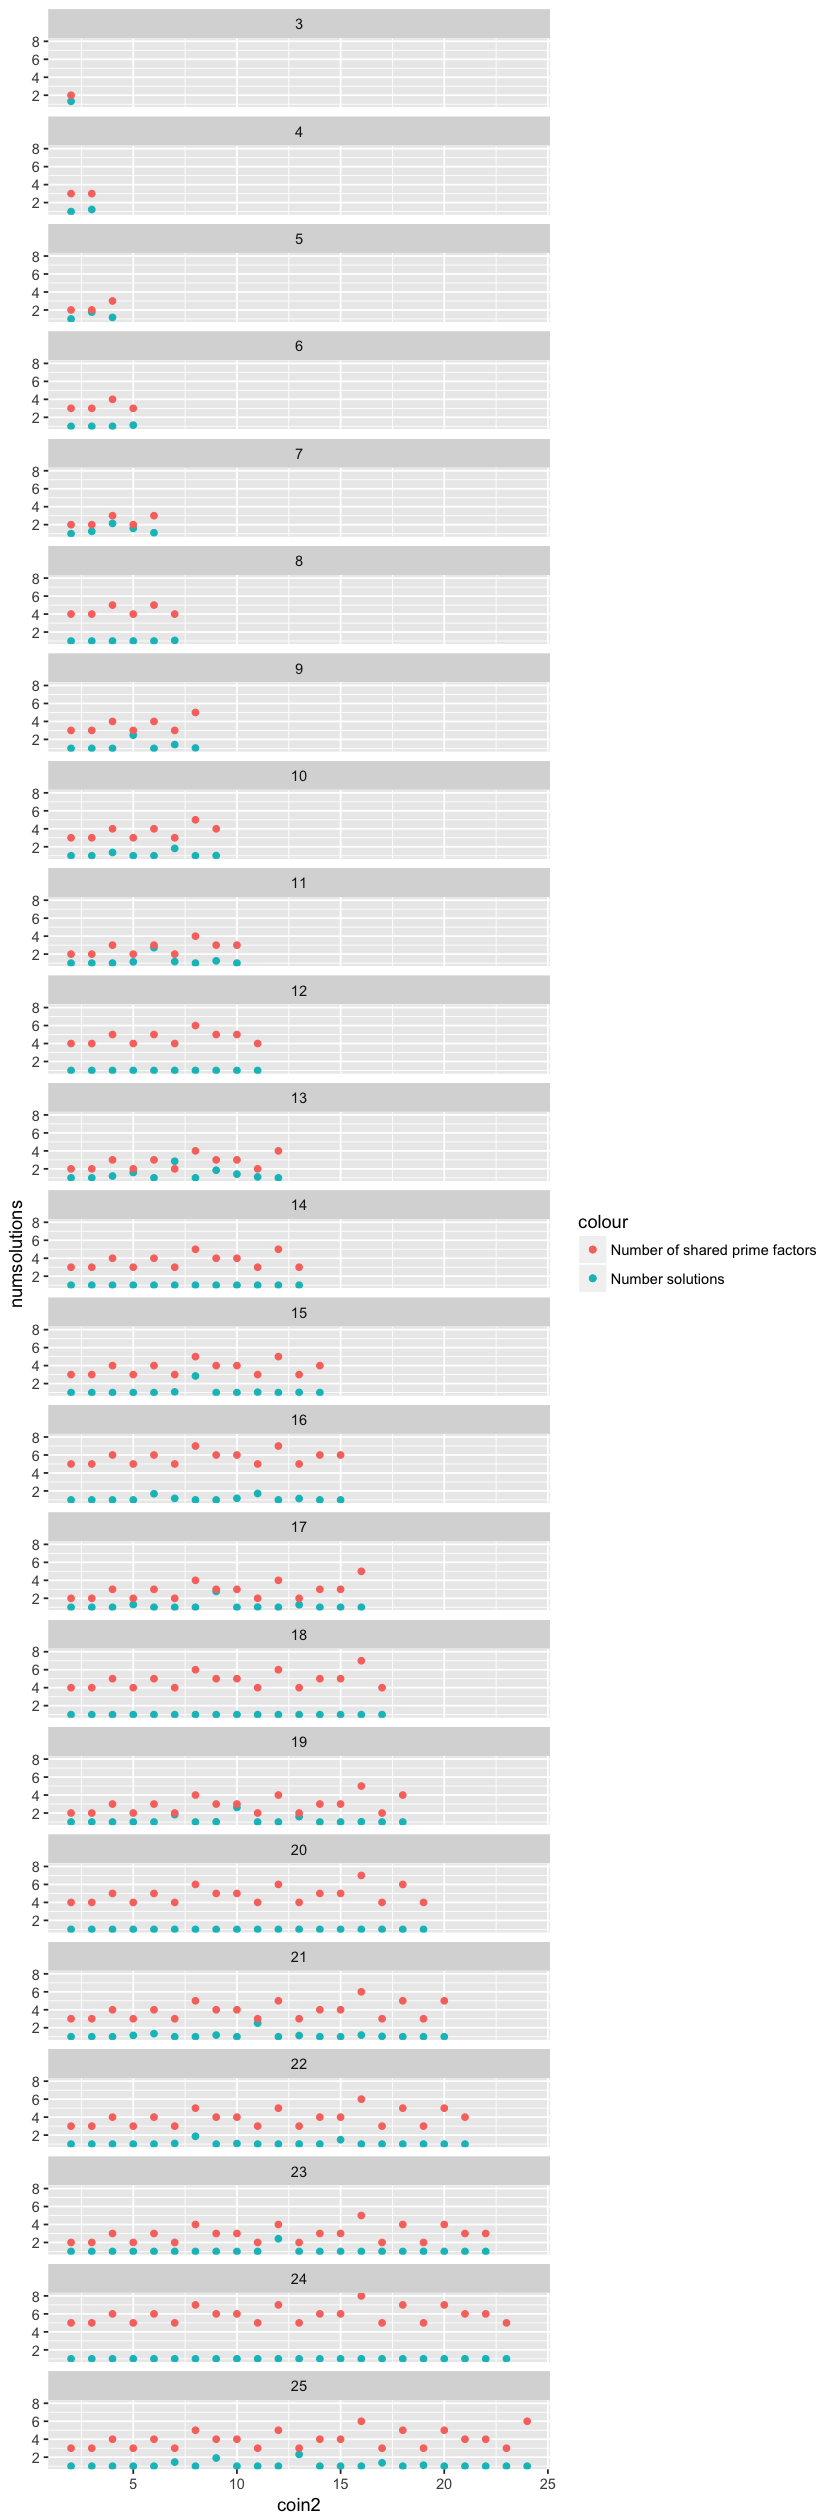

In [63]:
options(repr.plot.width=7, repr.plot.height=21)
(ggplot(subset(d.bydenom.primefactors,d.bydenom.primefactors$coin3 %in% 1:25),aes(x=coin2)) 
 + geom_point(aes(y=numsolutions,col="Number solutions")) 
 + geom_point(aes(y=numfactors,col="Number of shared prime factors")) 
 + facet_wrap(~coin3,ncol=1)
)

# By amount

Which numbers are harder to change? Intuitively, we suspect that numbers which are prime would be harder to make change for.

In [30]:
primeslist <- c(1,2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97)

pdf 
  2

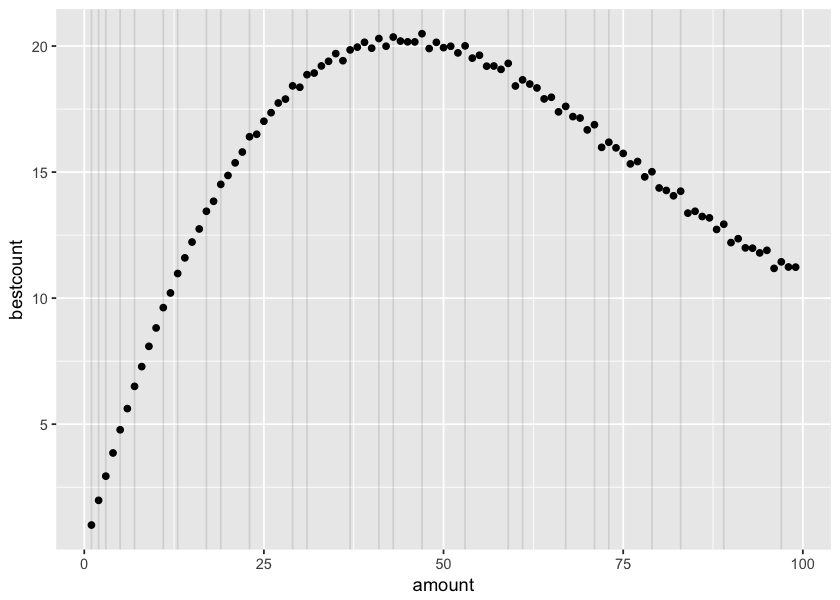

In [79]:
options(repr.plot.width=7, repr.plot.height=5)
(ggplot(d.byamt,aes(amount)) 
 + geom_point(aes(y=bestcount)) 
 + geom_vline(xintercept=primeslist,alpha=0.1)
)

png("denomination_3_analysis_solutions_byamount.png",height=480,width=640)
(ggplot(d.byamt,aes(amount)) 
 + geom_point(aes(y=bestcount)) 
 + geom_vline(xintercept=primeslist,alpha=0.1)
)
dev.off()

Interestingly, there is a peak around 50. This might be explained by the fact that we are taking the mean across all possible 3-coin denominations. Most numbers between 1 and 99 are not close to 50. 

The prime effect is not really noticeable for amounts < 15. Otherwise, there is usually a small uptick in the mean number of coins needed to make change for prime numbers. The effect is not large, but this probably represents the fact that any effect is "averaged out" because we are taking the mean across all possible denominations.

pdf 
  2

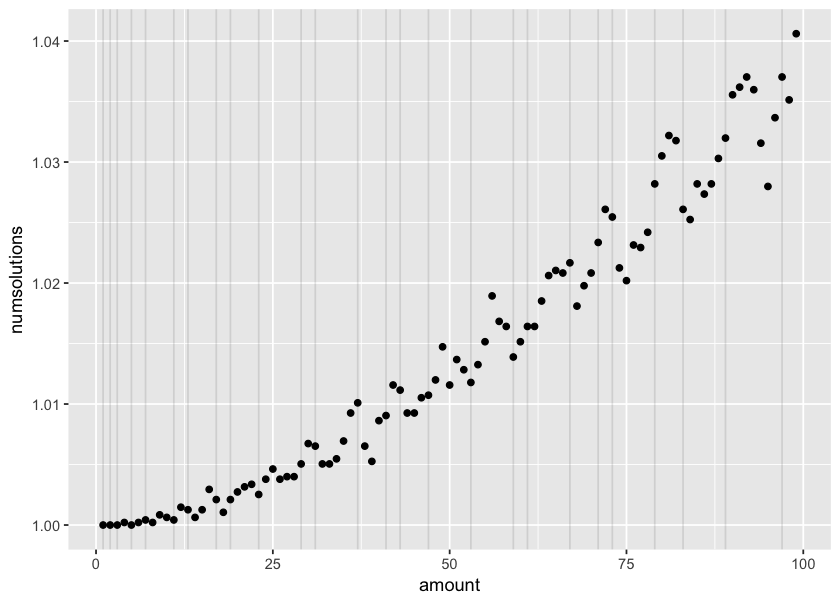

In [80]:
options(repr.plot.width=7, repr.plot.height=5)
(ggplot(d.byamt,aes(amount)) 
 + geom_point(aes(y=numsolutions)) 
 + geom_vline(xintercept=primeslist,alpha=0.1)
)

png("denomination_3_analysis_numsolutions_byamount.png",height=480,width=640)
(ggplot(d.byamt,aes(amount)) 
 + geom_point(aes(y=numsolutions)) 
 + geom_vline(xintercept=primeslist,alpha=0.1)
)
dev.off()

The larger the amount to change, the more likely it is that there is more than one way to change it. No surprise there. 

# Real-life data

In [83]:
sns <- scan("pricedata/stopnshop_data",what=numeric())

In [87]:
sns.df <- data.frame(value=sns)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


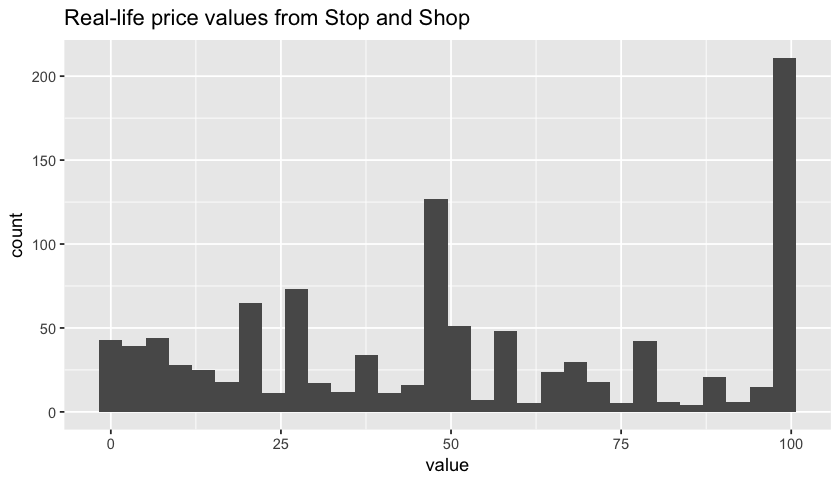

In [132]:
options(repr.plot.width=7, repr.plot.height=4)

(ggplot(sns.df,aes(value)) 
 + geom_histogram() 
 + labs(title="Real-life price values from Stop and Shop")
)

In [151]:
sns.counts <- as.data.frame(table(sns))

In [152]:
sns.counts <- subset(sns.counts,sns.counts$sns != 0)
sns.counts <- ddply(sns.counts,
                    'sns',
                    function(x) data.frame(raw=x$Freq,
                                           freq=x$Freq/sum(sns.counts$Freq)))

In [153]:
sns.counts <- ddply(sns.counts,
                    c('sns','raw','freq'),
                    function(x) data.frame(snscomp = 100 - as.numeric(as.character(x$sns))))

In [154]:
d.withfreq <- merge(d,
                    sns.counts,
                    by.x='amount',
                    by.y='sns')

In [155]:
head(d.withfreq)

amount,coin1,coin2,coin3,bestcount,numsolutions,raw,freq,snscomp
2,1,8,51,2,1,4,0.003948667,98
2,1,32,73,2,1,4,0.003948667,98
2,1,4,51,2,1,4,0.003948667,98
2,1,17,57,2,1,4,0.003948667,98
2,1,14,72,2,1,4,0.003948667,98
2,1,5,51,2,1,4,0.003948667,98


In [156]:
d.snsdistro <- ddply(d.withfreq,
                     c('coin1','coin2','coin3'),
                     function(x) data.frame(snscost = sum(x$freq*x$bestcount))) 

In [158]:
head(d.snsdistro)

coin1,coin2,coin3,snscost
1,2,3,18.337611
1,2,4,14.335637
1,2,5,11.805528
1,2,6,10.205331
1,2,7,8.795656
1,2,8,8.291214


pdf 
  2

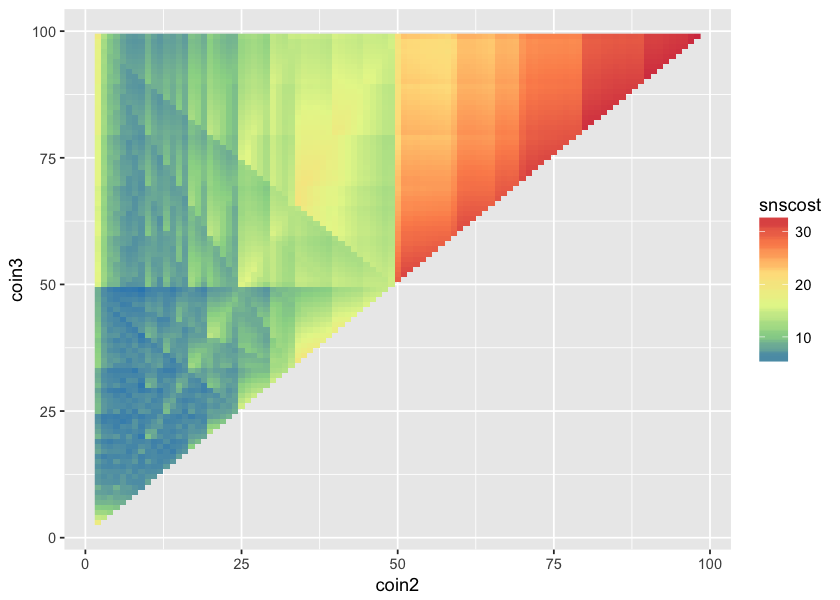

In [159]:
options(repr.plot.width=7, repr.plot.height=5)

d.snsdistro.plot.raster <- ( # Add parens to break ggplot2 code over multiple lines
ggplot(d.snsdistro,aes(coin2,coin3)) 
+ geom_raster(aes(fill=snscost)) 
+ scale_fill_distiller(palette="Spectral")
 )
d.snsdistro.plot.raster

png("denomination_3_analysis_stopnshop_solution_landscape.png",height=480,width=640)
d.snsdistro.plot.raster
dev.off()

In [198]:
head(d.snsdistro[order(d.snsdistro$snscost),])

,coin1,coin2,coin3,snscost
698,1,9,49,4.425469
679,1,9,30,4.687068
608,1,8,49,4.744324
425,1,6,49,4.762093
517,1,7,49,4.802567
669,1,9,20,4.811451


The optimal denomination with real-life prices is `1 9 49`, with empirical mean cost 4.43. 

## Optimizing changemaking for the cashier

The empirical distribution above was for supermarket prices. The resulting optimal denomination `1 9 49` makes it possible for the customer to minimize the number of coins that they have to use to pay those amounts.

For the cashier, the complementary distribution applies, because when given a $1 bill to pay for a .99 purchase, they have to make the change of 1 cent. 

Therefore, we 'flip' the distribution by assigning the weights for each amount $x$ to $100 - x$

In [161]:
d.withfreq.complement <- merge(d,
                               sns.counts,
                               by.x='amount',
                               by.y='snscomp')

In [162]:
d.snsdistro.complement <- ddply(d.withfreq.complement,
                                c('coin1','coin2','coin3'),
                                function(x) data.frame(snscost = sum(x$freq*x$bestcount))) 

pdf 
  2

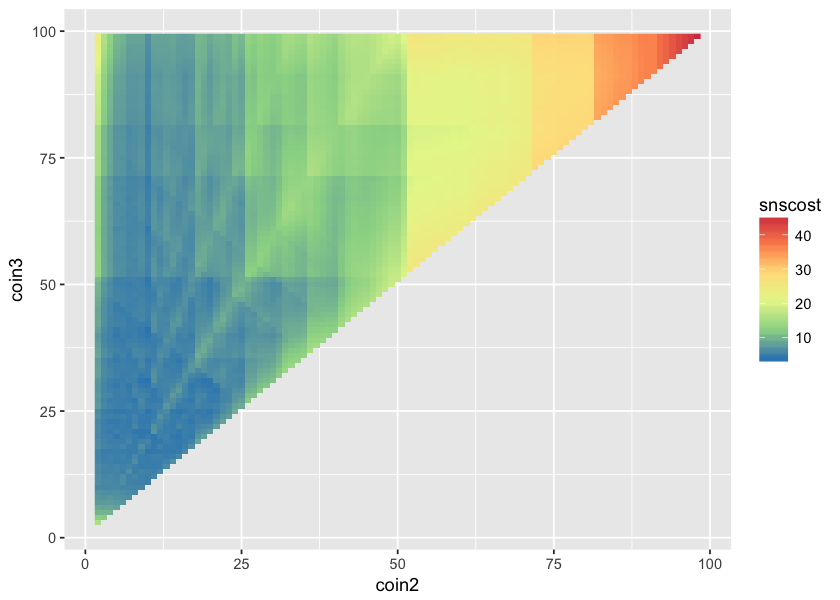

In [185]:
(ggplot(d.snsdistro.complement,aes(coin2,coin3))
 + geom_raster(aes(fill=snscost))
 + scale_fill_distiller(palette='Spectral'))

png("denomination_3_analysis_stopnshop_complement_solution_landscape.png",height=480,width=640)
(ggplot(d.snsdistro.complement,aes(coin2,coin3))
 + geom_raster(aes(fill=snscost))
 + scale_fill_distiller(palette='Spectral'))
dev.off()

In [196]:
head(d.snsdistro.complement[order(d.snsdistro.complement$snscost),])

,coin1,coin2,coin3,snscost
779,1,10,41,3.918065
769,1,10,31,4.021718
680,1,9,31,4.119447
763,1,10,25,4.125370
1525,1,19,31,4.143139
789,1,10,51,4.160908


The optimal denomination is now `1 10 41` with mean empirical cost 3.92. It is actually somewhat better to be a cashier, as the cost for the optimal cashier's denomination is about half a coin less than the optimal customer's denomination

In [182]:
subset(d.snsdistro.complement, 
       coin3 == 49 & coin2 == 9)

,coin1,coin2,coin3,snscost
698,1,9,49,5.363277


In [183]:
subset(d.snsdistro,
      coin2 == 10 & coin3 == 41)

,coin1,coin2,coin3,snscost
779,1,10,41,8.352419


## What is good for both customer and cashier?

For each denomination, we take the mean empirical cost for cashier and the mean empirical cost for customer (cost to change 100-x) and calculate the average. Thus we find compromise which optimizes for both cashier and customer

In [201]:
d.snsdistro.combine <- merge(d.snsdistro,d.snsdistro.complement,by=c('coin1','coin2','coin3'))

In [203]:
d.snsdistro.combine$meancost <- (d.snsdistro.combine$snscost.x + d.snsdistro.combine$snscost.y) / 2

In [204]:
head(d.snsdistro.combine)

coin1,coin2,coin3,snscost.x,snscost.y,meancost
1,10,11,7.628825,4.987167,6.307996
1,10,12,6.719645,5.044423,5.882034
1,10,13,6.105627,5.212241,5.658934
1,10,14,5.919052,4.760118,5.339585
1,10,15,7.076999,4.718657,5.897828
1,10,16,5.824284,4.762093,5.293189


In [205]:
head(d.snsdistro.combine[order(d.snsdistro.combine$meancost),])

,coin1,coin2,coin3,snscost.x,snscost.y,meancost
4639,1,9,30,4.687068,4.467917,4.577493
4629,1,9,20,4.811451,4.428430,4.619941
4640,1,9,31,5.270484,4.119447,4.694965
4649,1,9,40,4.818361,4.582428,4.700395
97,1,11,19,5.343534,4.265548,4.804541
353,1,14,17,5.187562,4.517275,4.852419


pdf 
  2

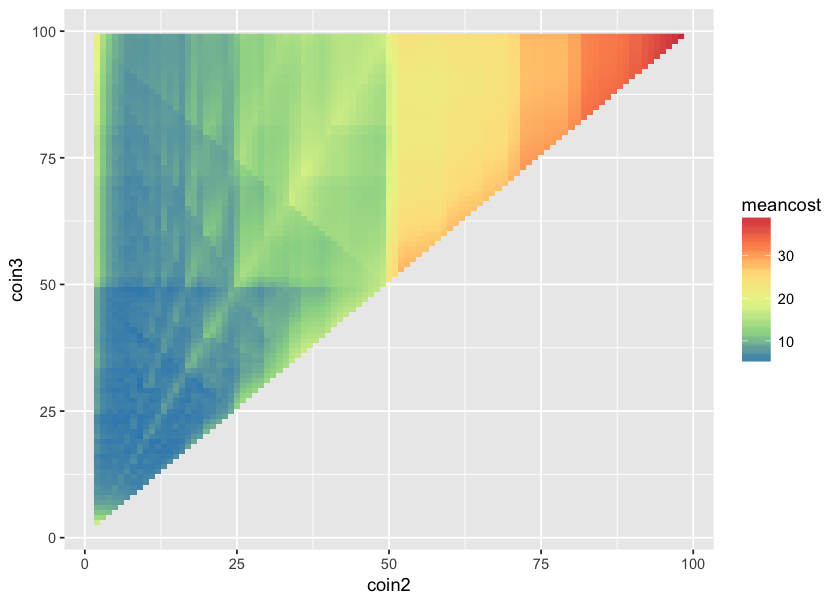

In [207]:
(ggplot(d.snsdistro.combine,aes(coin2,coin3)) 
 + geom_raster(aes(fill=meancost))
 + scale_fill_distiller(palette='Spectral')
)

png("denomination_3_analysis_stopnshop_combined_solution_landscape.png",height=480,width=640)
(ggplot(d.snsdistro.combine,aes(coin2,coin3)) 
 + geom_raster(aes(fill=meancost))
 + scale_fill_distiller(palette='Spectral')
)
dev.off()

In [208]:
save.image("denomination_3_analysis.Rdata")